In [1]:
#basic libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier



In [2]:
#!pip install tensorflow==2.7.0

In [3]:
#!pip install keras==2.7.0

In [4]:
#!pip install pydot

In [5]:
#Digit MNIST dataset
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [6]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

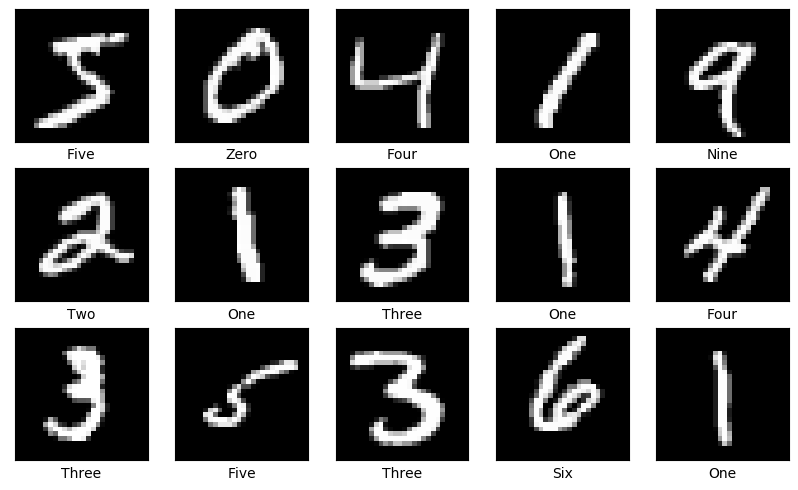

In [10]:
#names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):  #15rows
    plt.subplot(5,5,i+1) #5*3
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray') #imshow--for showing image
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()


In [11]:
x_train_digit.shape   #3dimension #preprocess this and convert to 2dimension
#shape(rows,columns)    60000-count,28*28-each image row&column

(60000, 28, 28)

In [12]:
x_train_digit=x_train_digit.reshape(60000,784)   #reshape--used to convert 3D to 2D becoz 3D gives error in ANN
x_test_digit=x_test_digit.reshape(10000,784)

In [13]:
x_train_digit.shape

(60000, 784)

In [14]:
y_test_digit.shape    #o/p

(10000,)

In [15]:
#Encoding digit MNIST labels
y_train_digit=to_categorical(y_train_digit,num_classes=10)#how many classes 
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [16]:
y_train_digit[1] #one hot encoding   #2D-->i/p    #one hot encoding-->o/p


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#PROCEDURE
#Creating base neural network   #brain activity  
model = keras.Sequential([    #keras-deeplearning library  #ANN process -sequential process
    layers.Dense(256, activation='relu', input_shape=(784,)),    #Dense-interconnected  #256-neuron ,activation-check valid info
  #relu-max(0,i/p),784-i/p hidden layer-256
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), #previous o/p goes to next i/p
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),#10-classification count,output layer,sigmoid-gives highest
])

In [18]:
#param_number = output_channel_number * (input_channel_number + 1)   # 256*(784+1)=200960
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compiling the model         DL- 1.brain creation,2.compile 3.fit method
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [20]:
# model creation   i/p,o/p--supervised learning
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(x_test_digit, y_test_digit)) # 1epoch-run all and check then repeat as 2 epoch
#complete 1 feedforward,backpropagation -1 epoch

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 1.3947 - accuracy: 0.8466 - val_loss: 0.3456 - val_accuracy: 0.9215
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9303 - val_loss: 0.2232 - val_accuracy: 0.9414
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1764 - accuracy: 0.9517 - val_loss: 0.2089 - val_accuracy: 0.9499
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1503 - accuracy: 0.9585 - val_loss: 0.1869 - val_accuracy: 0.9529
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1261 - accuracy: 0.9648 - val_loss: 0.2104 - val_accuracy: 0.9550
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9713 - val_loss: 0.1608 - val_accuracy: 0.9640
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9721 - val_loss: 0.1900 - val_accuracy: 0.9618
Epoch 

In [33]:
#predicting the labels-DIGIT
y_predict=model.predict(x_test_digit)   #checking

In [34]:
y_predict

array([[1.2925267e-04, 4.1592330e-02, 9.2054266e-01, ..., 1.0000000e+00,
        1.6292751e-02, 1.4773905e-03],
       [4.0257156e-02, 9.9999893e-01, 1.0000000e+00, ..., 1.7062235e-01,
        1.0000000e+00, 8.6699323e-18],
       [4.3569140e-05, 1.0000000e+00, 1.7635000e-01, ..., 5.7584637e-01,
        9.8332745e-01, 5.1943749e-02],
       ...,
       [3.4955144e-04, 7.5898618e-02, 5.9351100e-06, ..., 9.7116029e-01,
        5.0286758e-01, 9.9988109e-01],
       [9.9999899e-01, 9.4282132e-01, 9.6172869e-01, ..., 1.8559992e-02,
        9.9999869e-01, 7.5896227e-01],
       [9.9980342e-01, 9.9999237e-01, 9.9999261e-01, ..., 1.6294584e-06,
        1.0000000e+00, 4.3827295e-04]], dtype=float32)

In [22]:
y_predict[0]

array([1.2925267e-04, 4.1592330e-02, 9.2054266e-01, 1.2784711e-01,
       3.6045909e-04, 8.5117892e-05, 6.3312723e-07, 1.0000000e+00,
       1.6292751e-02, 1.4773905e-03], dtype=float32)

In [23]:
y_predicts=np.argmax(y_predict, axis=1)
# Here we get the index of maximum value in the encoded vector

In [24]:
y_predicts  #predicted testset data

array([7, 2, 1, ..., 4, 5, 5], dtype=int64)

In [25]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)  #actual testset data

In [26]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

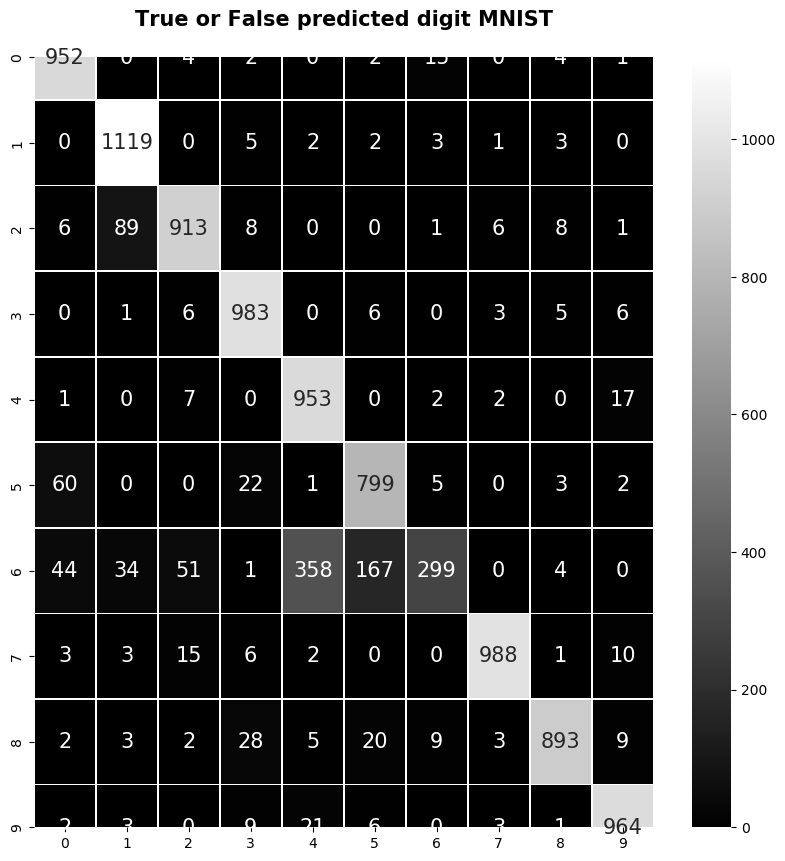

In [27]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)#--->actual,predicted
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()
# diagonal -correctly classified remaining wrongly classified
# 1119-correctly classified 1 as 1

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       980
           1       0.89      0.99      0.94      1135
           2       0.91      0.88      0.90      1032
           3       0.92      0.97      0.95      1010
           4       0.71      0.97      0.82       982
           5       0.80      0.90      0.84       892
           6       0.90      0.31      0.46       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.92      0.94       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.87     10000
weighted avg       0.89      0.89      0.87     10000



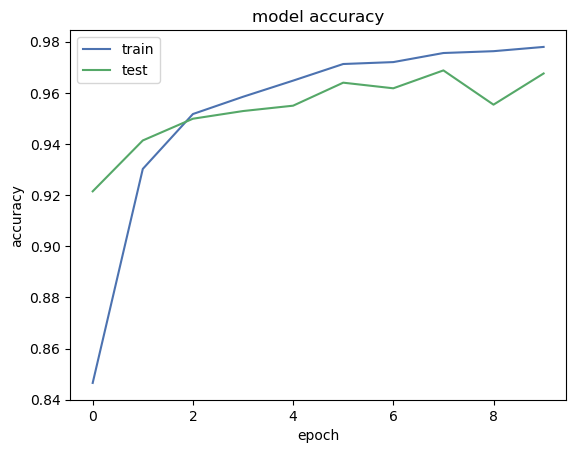

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
#low to high-good 

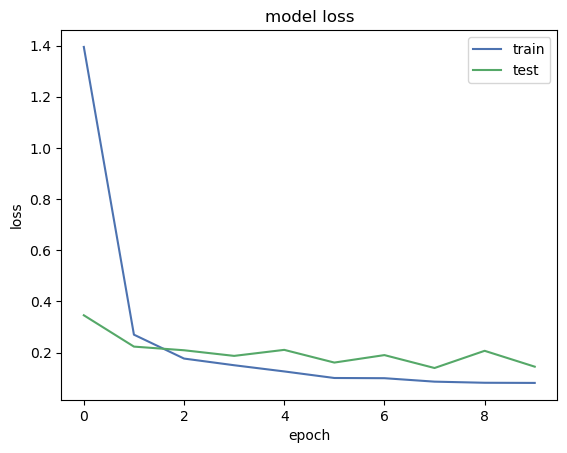

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
#high to low-good  -->mistakes to correction

In [31]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

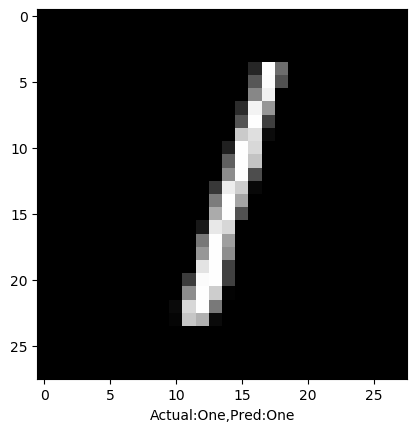

In [32]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()